In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
df = pd.read_csv("NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
sns.set(rc = {'figure.figsize' :(10,5)})

Set Date as Index

In [5]:
df['date']=pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018-02-05
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018-02-06
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018-02-07
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018-02-08
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018-02-09


Analys stocks what volume ofstocks trade

DATA VISUALISATION

Text(0.5, 1.0, 'volume of stock versus time')

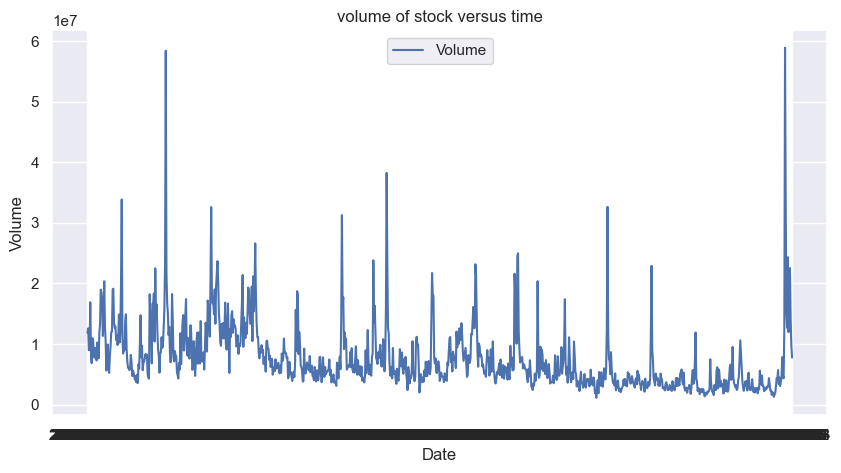

In [12]:
sns.lineplot(x=df.index, y = df['Volume'], label= 'Volume')
plt.title ('volume of stock versus time')

<Axes: title={'center': 'Netflixstock price'}, xlabel='Date'>

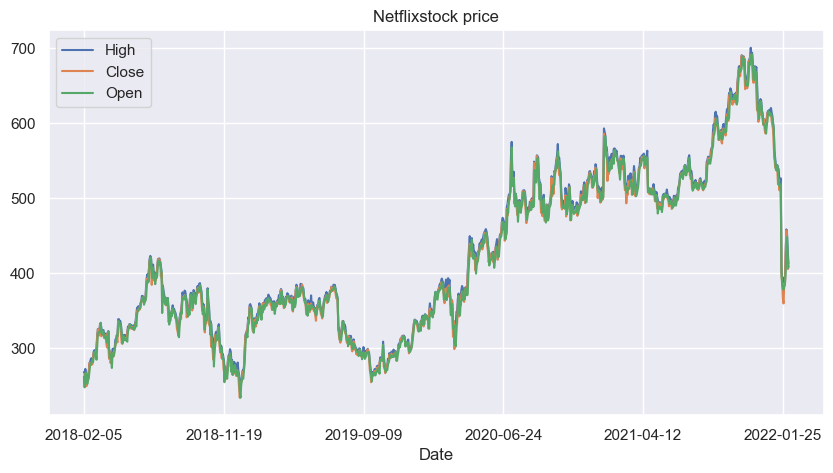

In [13]:
df.plot(y= ['High', 'Close', 'Open'], title = 'Netflixstock price')

Day, Month,Yearly stock price graph analysis

<Axes: xlabel='Year'>

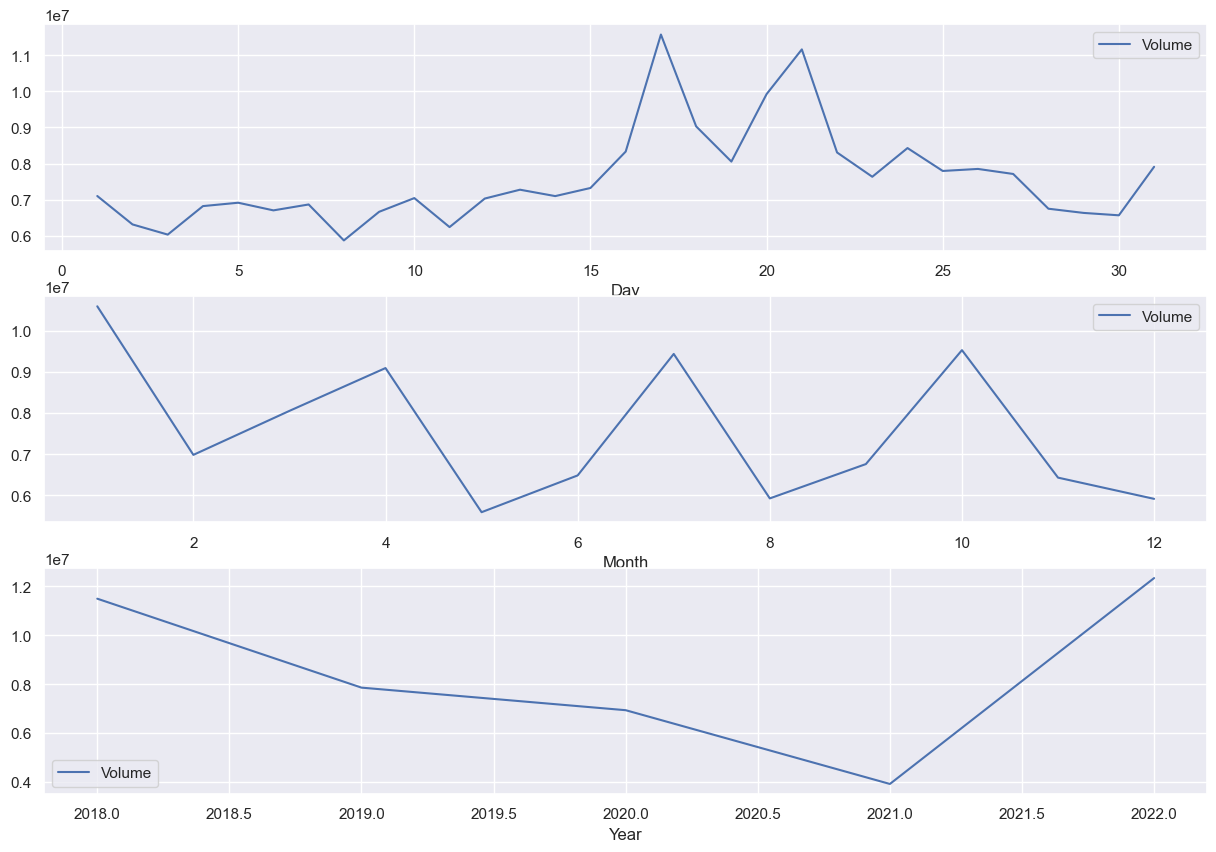

In [34]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (15,10))
df.index = pd.to_datetime(df.index)
df.groupby(df.index.day).mean().plot(y ='Volume', ax = ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y ='Volume', ax = ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y ='Volume', ax = ax3, xlabel='Year')

# Dates with Highest Stock Price

In [35]:
df

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018-02-05
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018-02-06
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018-02-07
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018-02-08
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018-02-09
...,...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022-01-31
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022-02-01
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022-02-02


In [39]:
a = df.sort_values(by = 'High', ascending = False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

# Dates with Low Stock Price

In [40]:
b = df.sort_values(by = 'Low', ascending = True).head(5)
b['Low']

Date
2018-12-26    231.229996
2018-12-24    233.679993
2018-02-09    236.110001
2018-12-27    240.100006
2018-12-21    241.289993
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

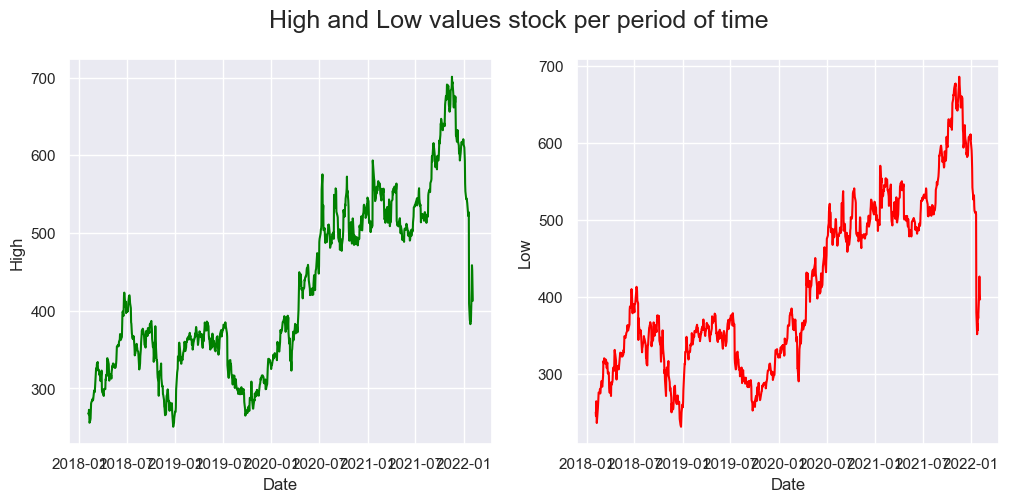

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 5))
fig.suptitle('High and Low values stock per period of time', fontsize=18)
sns.lineplot(ax=axes[0], y=df['High'], x=df.index, color='green')
sns.lineplot(ax=axes[1], y=df['Low'], x=df.index, color='red')